In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

Text(value='', description='Your Traits:', layout=Layout(width='70%'), placeholder='Describe yourself...')

Button(button_style='success', description='Predict', style=ButtonStyle())

Label(value='')

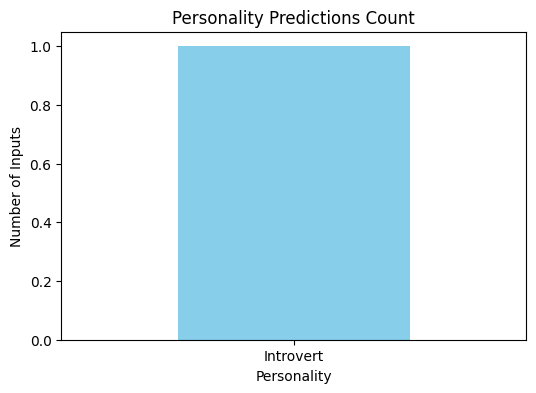

In [14]:
personality_keywords = {
    "Extrovert": ["talk", "party", "social", "friends", "outgoing", "fun","Movies"],
    "Introvert": ["alone", "quiet", "books", "peace", "home", "thoughtful","shy","Not talk Too much"],
    "Ambivert": ["sometimes", "depends", "mix", "both", "balanced","Some Times go For movies",""]
}

# DataFrame to store history
history = pd.DataFrame(columns=["Input", "Personality"])

# Function to predict personality
def predict_personality(text):
    global history
    text_words = text.lower().split()
    scores = {key:0 for key in personality_keywords}

    for personality, keywords in personality_keywords.items():
        for word in text_words:
            if word in keywords:
                scores[personality] += 1

    predicted = max(scores, key=scores.get)
    if scores[predicted] == 0:
        predicted = "Ambivert"

    # Save to history
    history = pd.concat([history, pd.DataFrame({"Input":[text], "Personality":[predicted]})], ignore_index=True)

    # Update result label
    result.value = f"🎯 Predicted Personality: {predicted}"

    # Update visualization
    visualize_history()

# Function to visualize history
def visualize_history():
    plt.figure(figsize=(6,4))
    counts = history['Personality'].value_counts()
    counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
    plt.title("Personality Predictions Count")
    plt.ylabel("Number of Inputs")
    plt.xticks(rotation=0)
    plt.show()

# Widgets
text_input = widgets.Text(
    value='',
    placeholder='Describe yourself...',
    description='Your Traits:',
    layout=widgets.Layout(width='70%')
)
predict_button = widgets.Button(description="Predict", button_style='success')
result = widgets.Label(value="")

# Event
predict_button.on_click(lambda b: predict_personality(text_input.value))

# Display UI
display(text_input, predict_button, result)